<a href="https://colab.research.google.com/github/victorteodoro/projeto-aplicado-ii/blob/main/6_Aplicando_o_modelo_treinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abrindo o projeto

Abrimos o projeto para ler lista de categorias e seus índices definidos pelo conjunto de treinamento.

--2024-05-17 21:31:19--  https://asav.com.br/carcara/modulo.py
Resolving asav.com.br (asav.com.br)... 108.179.252.164
Connecting to asav.com.br (asav.com.br)|108.179.252.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54740 (53K)
Saving to: ‘modulo.py.2’

modulo.py.2         100%[===================>]  53.46K  --.-KB/s    in 0.1s    

2024-05-17 21:31:20 (440 KB/s) - ‘modulo.py.2’ saved [54740/54740]

Digite a chave de acesso: ··········

-----------------------

2023-08-04



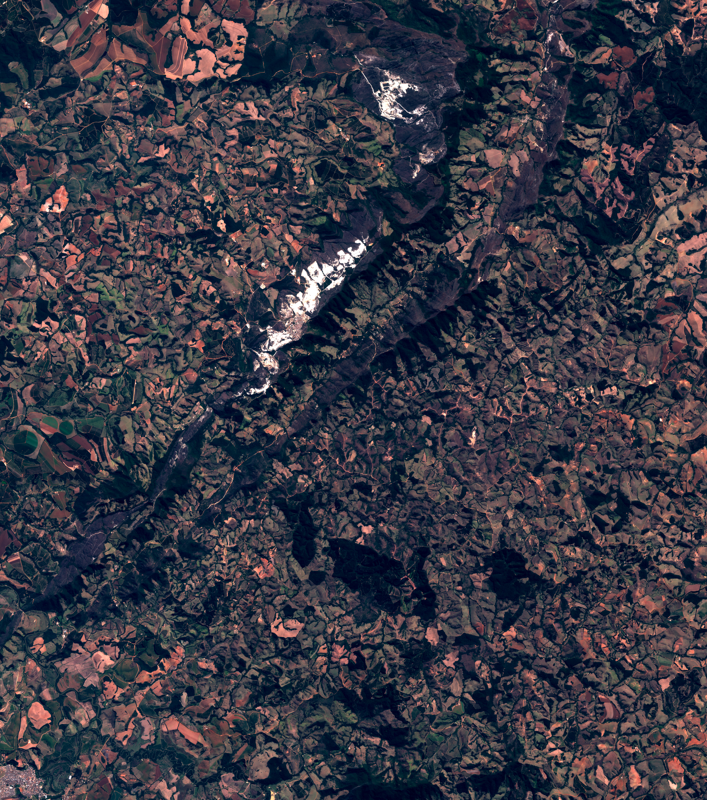

,indice,nome,cor
0,1,área preservada,00ff00


In [19]:
!wget https://asav.com.br/carcara/modulo.py

with open("modulo.py", 'r') as file:
    exec(file.read())

import getpass

CKEY = getpass.getpass('Digite a chave de acesso: ')

print("\n-----------------------\n")

projeto = ProjetoCarcara("2024-1-agua-e-vida-stl", ftp=ftplib.FTP("ftp.asav.com.br", "datascience@asav.com.br", CKEY))

abrir_mapa = 2  # escolhemos o mapa de índice 2

print(projeto.galeria['data'].iloc[abrir_mapa]+"\n")

imagem = projeto.abrirMapa(projeto.galeria['mapa_id'].iloc[abrir_mapa]) # imagem de satélite baixada
img=imagem.visualizarMapa(projeto.area_interesse[0], projeto.area_interesse[1], projeto.area_interesse[2], projeto.area_interesse[3])

mascara = imagem.mascaras['objeto'].iloc[0]

display(mascara.categorias)

# Abrindo o modelo treinado

O modelo treinado se encontra disponível online em:

https://asav.com.br/carcara/2024-1-agua-e-vida-stl/modelo/seriema-2024-04-15_15-16-03-343308.keras

Vamos baixá-lo e carregá-lo no Keras.

In [15]:
import requests
from keras.models import load_model

url_modelo = "https://asav.com.br/carcara/2024-1-agua-e-vida-stl/modelo/seriema-2024-04-15_15-16-03-343308.keras"

# Adicionando cabeçalhos adicionais para evitar o erro 406
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.5",
    "Connection": "keep-alive"
}

response = requests.get(url_modelo, headers=headers)

if response.status_code == 200:
    with open('modelo.keras', 'wb') as f:
        f.write(response.content)
    model = load_model('modelo.keras')
    print("Modelo carregado com sucesso")
else:
    print(f"Erro ao baixar o arquivo: {response.status_code}")


Modelo carregado com sucesso


# Predizendo novas situações

Agora aplicamos o modelo carregado para prever o mapa inteiro.

Quadro  1  de  72 :
306/306 [==============================] - 1s 4ms/step
Quadro  2  de  72 :
310/310 [==============================] - 1s 4ms/step
Quadro  3  de  72 :
310/310 [==============================] - 1s 4ms/step
Quadro  4  de  72 :
310/310 [==============================] - 1s 4ms/step
Quadro  5  de  72 :
310/310 [==============================] - 2s 6ms/step
Quadro  6  de  72 :
310/310 [==============================] - 1s 4ms/step
Quadro  7  de  72 :
310/310 [==============================] - 1s 4ms/step
Quadro  8  de  72 :
307/307 [==============================] - 1s 4ms/step
Quadro  9  de  72 :
310/310 [==============================] - 1s 4ms/step
Quadro  10  de  72 :
313/313 [==============================] - 1s 4ms/step
Quadro  11  de  72 :
313/313 [==============================] - 2s 6ms/step
Quadro  12  de  72 :
313/313 [==============================] - 1s 4ms/step
Quadro  13  de  72 :
313/313 [==============================] - 1s 4ms/step
Quadro  14  de  72 :


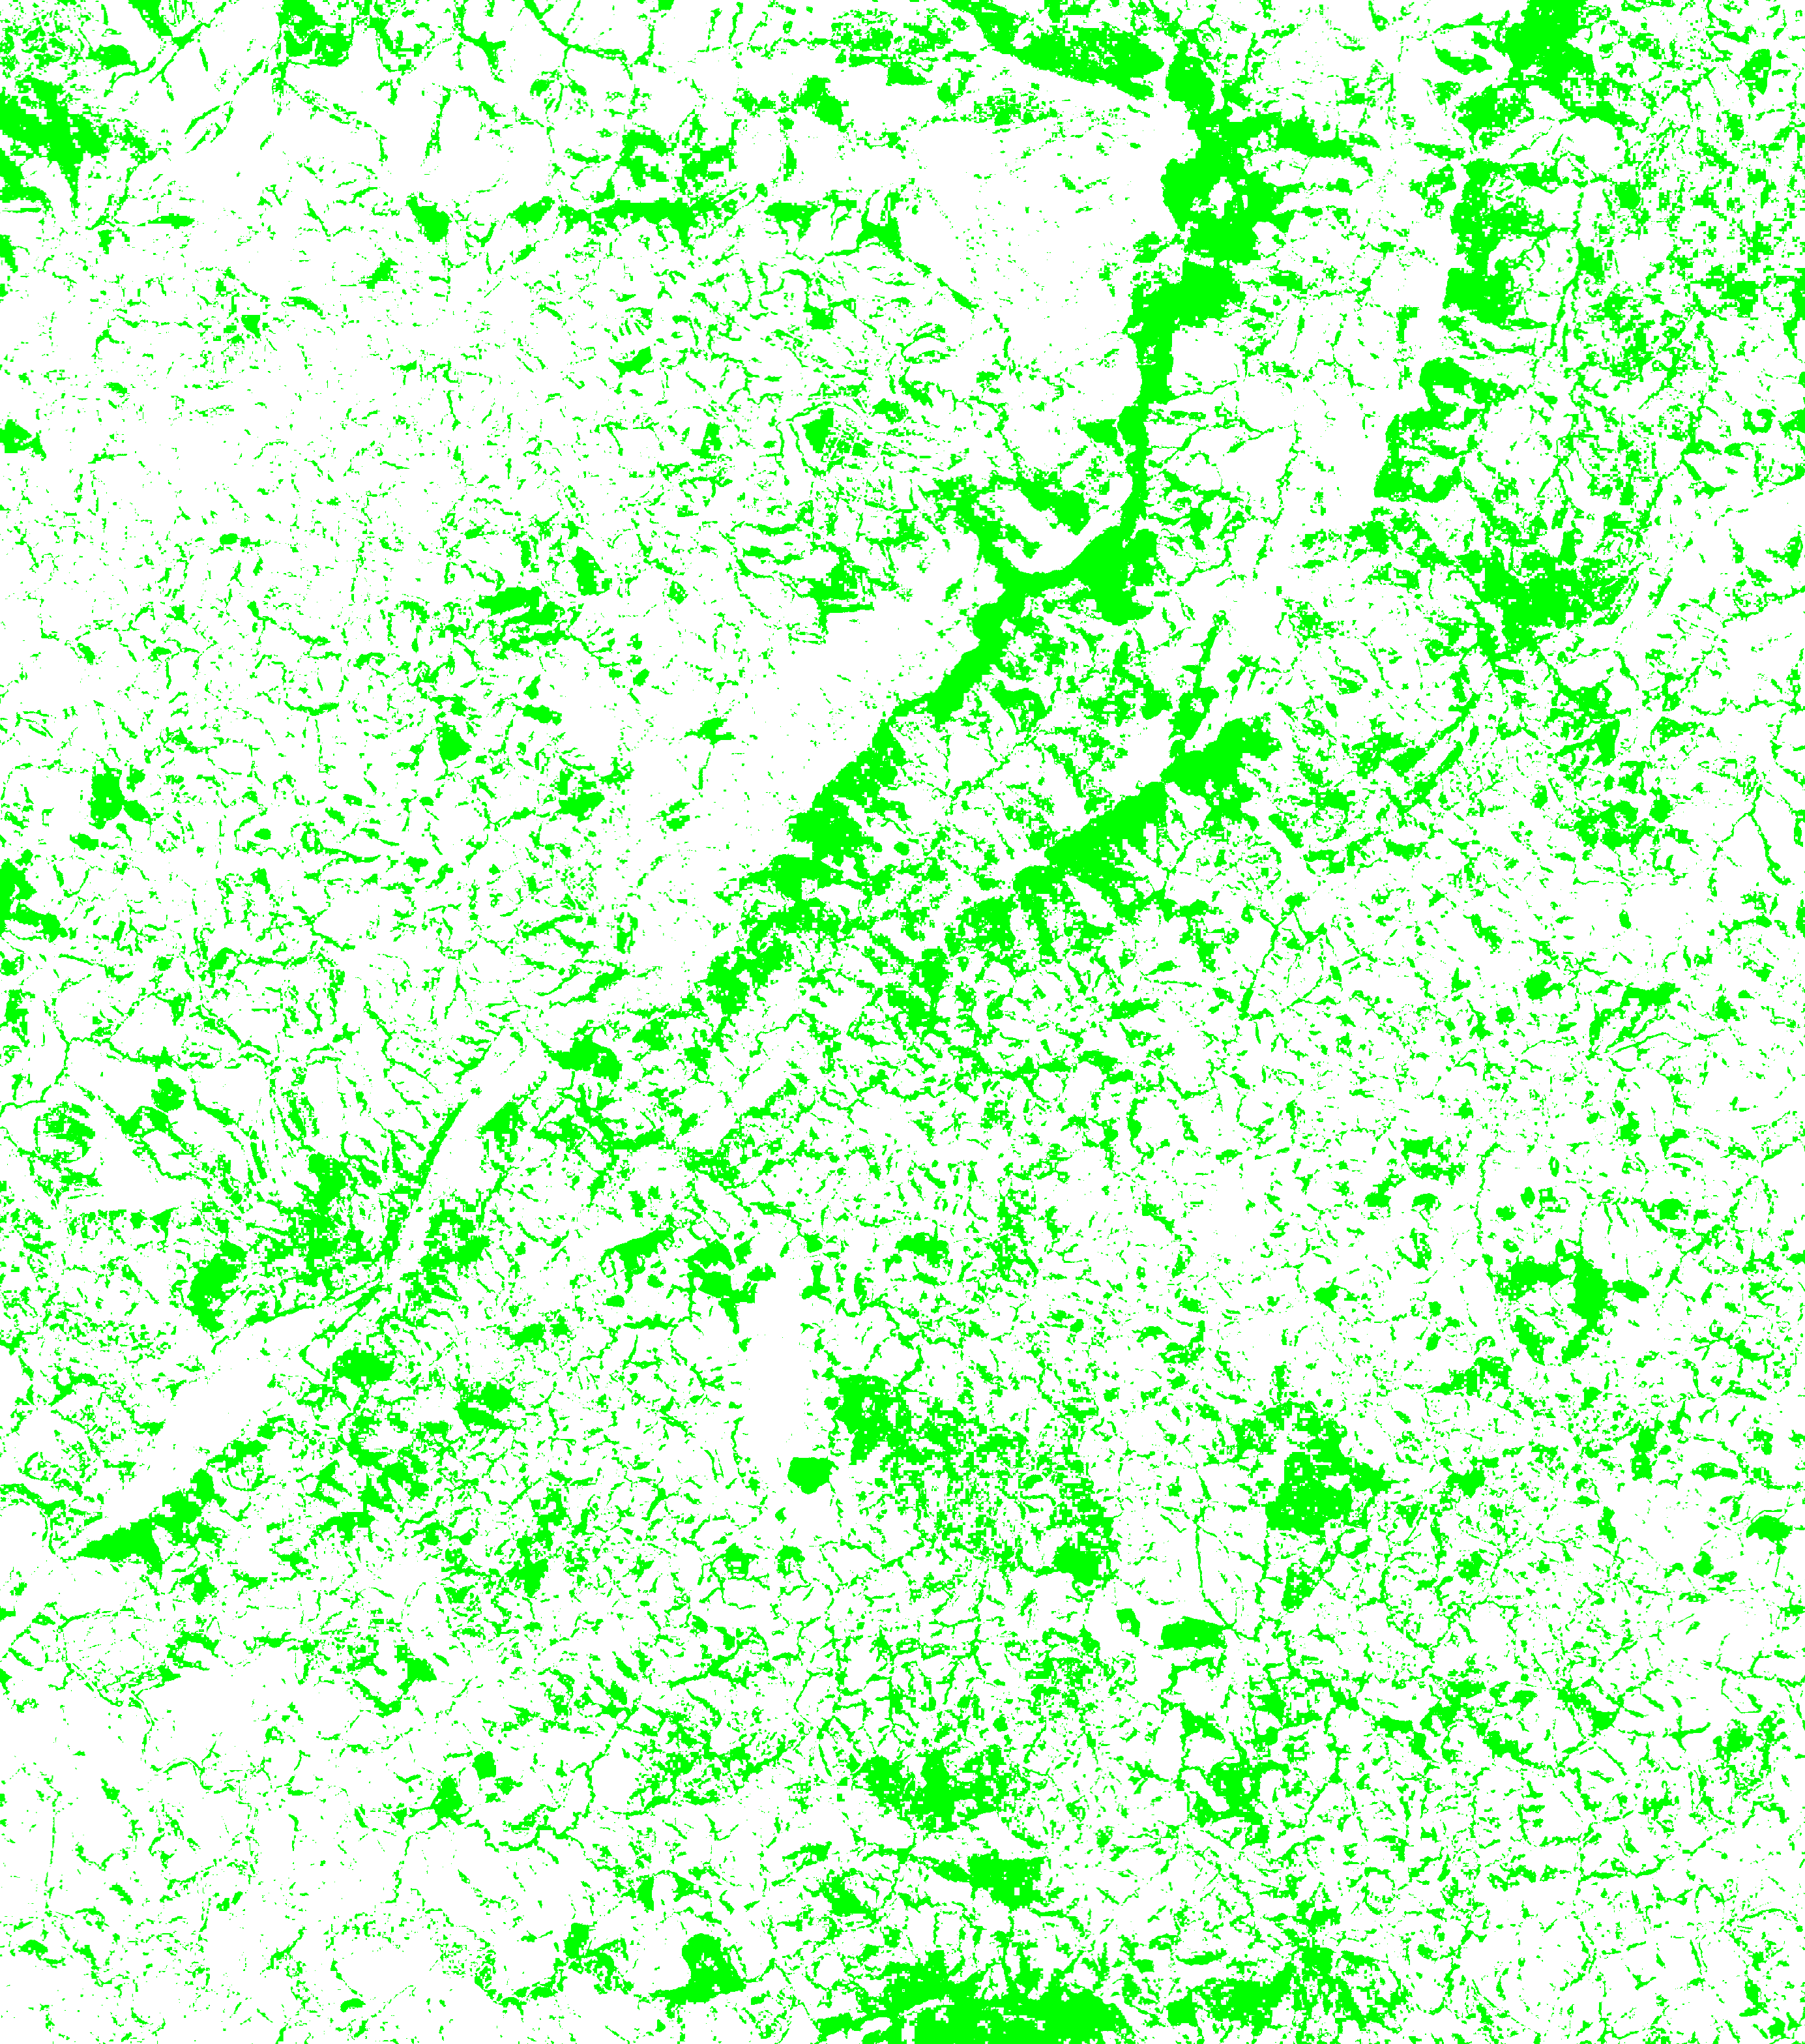

In [20]:
import numpy as np

# Define as categorias de saída do modelo
categorias_seriema = imagem.mascaras['objeto'].iloc[0].categorias

# Prediz a imagem usando a rede neural treinada
imagem.predizerMascara("exemplo",model,categorias_seriema)

# Defimos a área que será mostrada na imagem de saída
min_lat, max_lat, min_lon, max_lon = projeto.area_interesse

# Vizualizamos a máscara como imagem
resultado = imagem.visualizarMascara( "exemplo", min_lat, max_lat, min_lon, max_lon, max_tamanho=80000 )

# Utilizando os resultados

Agora podemos utilizar a imagem renderizada através das predições da rede neural para estimar a área preservada.

In [21]:
pixels = list(resultado.getdata())

# Contar a frequência de cada cor
preservado = 0
total = 0
for cor in pixels:
    if cor[3]>127:
        preservado += 1
    total += 1

# Calcular a porcentagem de pixels preservados
porcentagem = (preservado / total) * 100

print(round(porcentagem,3)," % de área preservada")

22.515  % de área preservada
